#Harmonic Oscilator
It is dificult to determine eigenenergies and eigenfunctions of this system analitally. 


In [26]:
import matplotlib.pyplot as plt
import numpy as np

The potential $V_{0}$ changes to $V_{0}x^2$. This is the same approach as with clasical mechanics. In the clase of classical mechanics. the potential is given by: <br/>
$\frac{1}{2}\cdot V_{0}\cdot x^2$



In [27]:
h = 1 # plank constant
m = 1 # electron mass
V_0 = 0.5 # explained above 

Furthermore, we do not have a well defined box anymore, so we must propagate the wave function from $[-\infty:\infty]$. This can not be done, so we define some small value and we propagate the system until the value is quite large.

In [28]:
a = 3 # final interval
x = -a # initial interval
dx = 1e-2 # increment to parkourir the wave function

For the wave function we need to select a small value for the wave function. We are assuming a finite potential box in which the potential outside the box is limited. Therefore, the electron can penetrate into the potential barrier. 

In [29]:
# initial conditions Psi(0) = 0 & dPsi(0) = 1
psi = 1e-2
d_psi = 0

In [30]:
E = 0.5 # Energy Potential (eigenvalue)

In [31]:
# store eigenfunction
x_list = list()
psi_list = list()

The wave function must go to zero in 0 and a according to the potential well's boundary condition. 

In [32]:
while x <= a:
  d2_psi = 2*m/h**2*(V_0*x**2-E)*psi # second derivative
  d_psi = d_psi + d2_psi * dx # the explanaiton for the formula is detailed above. 
  psi = psi + d_psi *dx
  x = x + dx
  x_list.append(x)
  psi_list.append(psi)

  

We need to find the values of $a$ and $E$ so that the function does not evolve exponentially into really large values and it goes to zero at both energy barriers. 
- $\Psi(-a)  = 0$
- $\Psi(a) = 0$ 

Text(0.5, 1.0, 'Wave Function $\\Psi $')

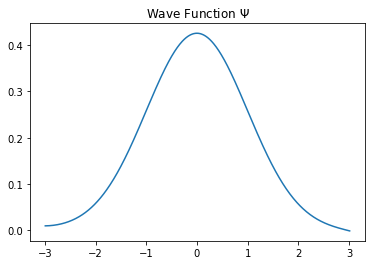

In [33]:
plt.figure()
plt.plot(x_list,psi_list)
plt.title("Wave Function " + r'$\Psi $')

#### Generation of eigenergies & values for many energy levels: 


In [34]:
h = 1 # plank constant
m = 1 # electron mass
V_0 = 0.5 # explained above 

We want to make $a$ energy dependent. Therefore, $V_{0}\cdot x^2 = E + 10 V_{0}$. If we solve this with respect to $a$ we get: $x = \frac{10+E}{V_{0}}$

In [35]:
E = 0.5 
a = np.sqrt(10+E/V_0)
x = -a
dx = 1e-2 # increment to parkourir the wave function

In [36]:
# initial conditions Psi(0) = 0 & dPsi(0) = 1
psi = 1e-2
d_psi = 0

In [37]:
# store eigenfunction
x_list = list()
psi_list = list()

In [38]:
while x <= a:
  d2_psi = 2*m/h**2*(V_0*x**2-E)*psi # second derivative
  d_psi = d_psi + d2_psi * dx # the explanaiton for the formula is detailed above. 
  psi = psi + d_psi *dx
  x = x + dx
  x_list.append(x)
  psi_list.append(psi)

Text(0.5, 1.0, 'Wave Function $\\Psi $')

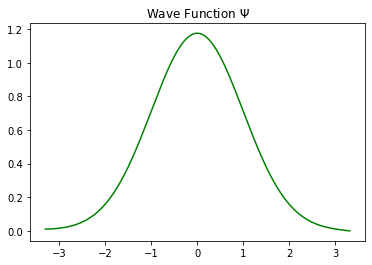

In [39]:
plt.figure()
plt.plot(x_list,psi_list,c = "green")
plt.title("Wave Function " + r'$\Psi $')

It is the same algorithm as with the particle in a box problem. The main changes are the $a$ interval and the $V_{0}$ equation discussed above. 

In [40]:
eigenfunctions = list()
eigenenergies = list()
eigen_functions_x_list = list()

In [41]:
E = 0
psi = 1
counter = 1
nmax = 10

In [42]:


while counter <= nmax:
  psi = 1
  while abs(psi) >2e-2:
    psi = 1e-2
    d_psi = 0.0
    x = 5e-2
    E = E + 5e-2
    a = np.sqrt(10 + E/V_0)
    x = -a
    x_list = list()
    psi_list = list()
    while x <= a:
      d2_psi = 2*m/h**2*(V_0*x**2-E)*psi # second derivative
      d_psi = d_psi + d2_psi * dx # first derivative
      psi = psi + d_psi *dx
      x = x + dx
      x_list.append(x)
      psi_list.append(psi)
  eigenfunctions.append(psi_list)
  eigen_functions_x_list.append(x_list)
  eigenenergies.append(E)
  counter += 1  
  E *= 1.1

Note we have equidistant energy levels. 

In [43]:
eigenenergies

[0.49999999999999994,
 1.5000000000000007,
 2.499999999999999,
 3.4999999999999964,
 4.499999999999995,
 5.499999999999993,
 6.499999999999991,
 7.499999999999989,
 8.499999999999993,
 9.499999999999995]

In [44]:
def plot_eigenfunctions(x,psi):
  plt.figure()
  for x,eigen in zip(x,psi):
    plt.plot(x,eigen)
  plt.title("Wave Functions " + r'$\Psi $')  

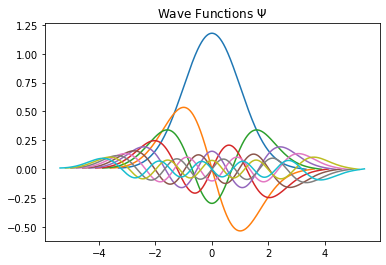

In [45]:
plot_eigenfunctions(eigen_functions_x_list,eigenfunctions)

We have energy levens increasing the level of zeros. 

### Normalize:
Find the correct amplitude for accomplishing the normalization $\int|\Psi|^2 = 1$ 

In [46]:
eigenfunctions_normalized = list()
for eigen in eigenfunctions:
  norm = np.dot(eigen,eigen)*dx
  normalized = [x / np.sqrt(norm) for x in eigen]
  eigenfunctions_normalized.append(normalized)

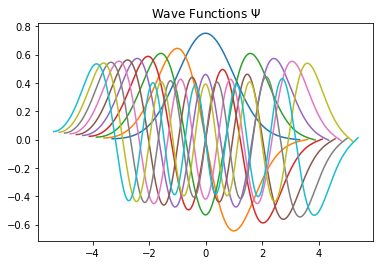

In [47]:
plot_eigenfunctions(eigen_functions_x_list,eigenfunctions_normalized)

The amplitudes of the wave functions can be different. 

### Probability Density:
We can see the *probability density* of the wave functions:

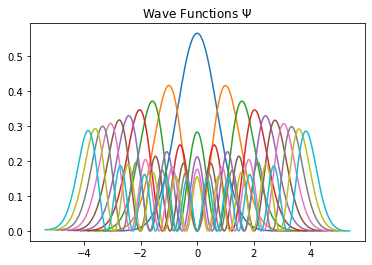

In [48]:
probability_densities = [np.square(eigen) for eigen in eigenfunctions_normalized]
plot_eigenfunctions(eigen_functions_x_list,probability_densities)

Plot the last energy level:

In [49]:
# classical equation


Text(0.5, 1.0, 'Quantum Mechanics Probability')

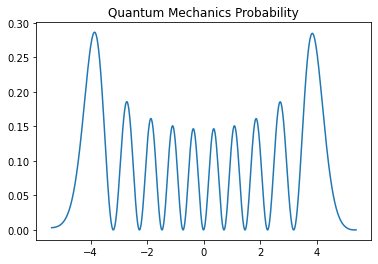

In [50]:
plt.figure()
plt.plot(eigen_functions_x_list[-1],probability_densities[-1])
plt.title("Quantum Mechanics Probability")

In the classical physics, we have as a solution of the oscilator something like this: $x(t) = cos(\omega t)$ where the probability is given by $p = \frac{1}{v}$. When the pendulum has the highest velocity it will spend the least amount of time in a given position.  If we look at the pendulum at a random point of time, the probability of finding the pendulum at a certain state will be greater when $v = 0$. <br/>
Then, starting from the classical pendulum equation $x(t) = cos(\omega t)$ we can express $x$ in terms of $t$ using $t(x) = arccos(x)$. <br/>
$v(t) = -sin(x) → -sin(arccos(x))$
<br/>
$p(x) = -\frac{1}{sin(arccos(x))} = -\frac{1}{\sqrt{1-x^2}}$ <br/>
Since the probability is the absolute value, we can put it positive like this: <br/>
$p(x) = \frac{1}{\sqrt{1-x^2}}$ 